In [1]:
import numpy as np
import matplotlib.pyplot as plt


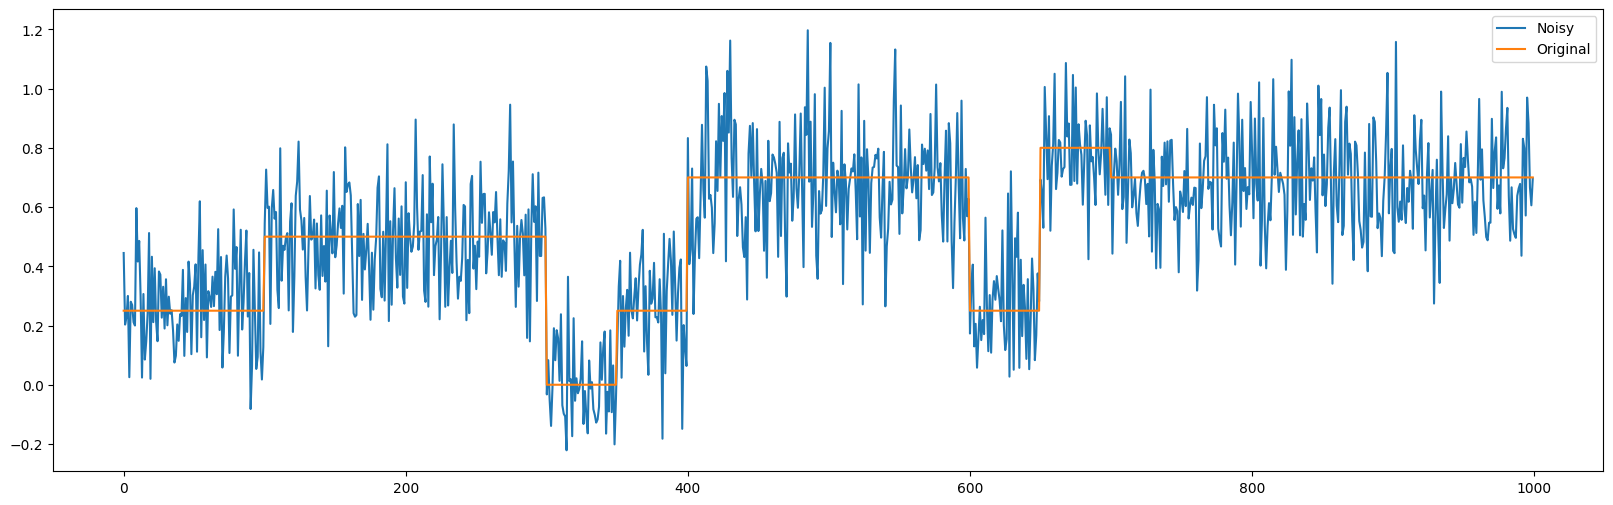

In [4]:
# zs = np.load("Blocks.npy");

# I think Blocks.npy was generated by Nelly (it must be in some of her example code somewhere for chambolle-pock)

# Here's some example thing
zs = np.zeros(1000);
zs[0:100] = 0.25;
zs[100:300] = 0.5;
zs[350:400] = 0.25;
zs[400:600] = 0.7;
zs[600:650] = 0.25;
zs[650:700] = 0.8;
zs[700:1000] = 0.7;

ts = np.arange(0, zs.shape[0]);

# Add noise!
ys = zs + np.random.normal(0, 0.4**2, size=(zs.shape[0]))

plt.figure(figsize=(20,6));
plt.plot(ts, ys, label='Noisy');
plt.plot(ts, zs, label='Original');
plt.legend();
plt.show();

In [6]:
# Proximity function for L1 norm
def prox_L1(u, tau):
    return np.sign(u)*np.maximum(np.abs(u)-tau, 0);

# Moreau Decomposition -- conj of indicator is L1 norm 
def prox_indicator(u, chi, tau):
    return u - tau*prox_L1(u/tau, chi/tau);

In [7]:
np.roll([1,2,3], 1)

array([3, 1, 2])

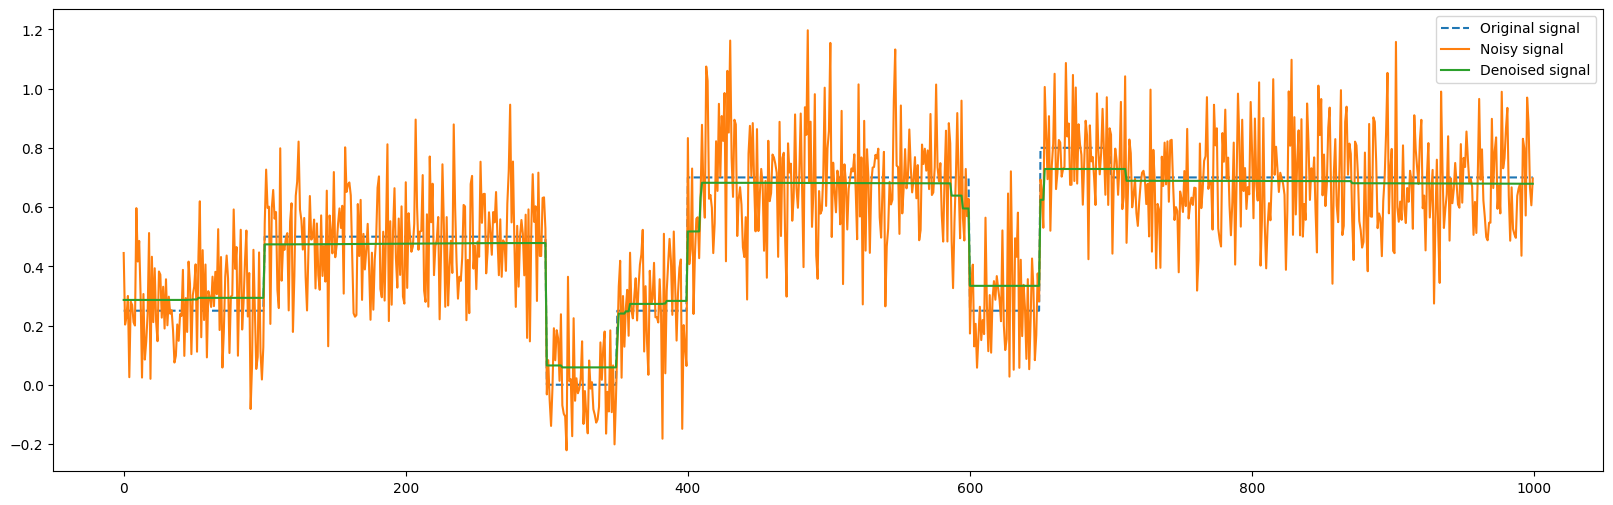

In [8]:
# L operator
def opL(x):
    y = x - np.roll(x, 1); # [-1, 1] conv...
    y[0] = 0; # L should R^N -> R^(N-1)
    # Therefore the conjugate should map R^(N-1) -> R^N [RIGHT!?]
    return y;

def opLconj(x):
    N=len(x)
    y=x-np.roll(x,-1) 
    y[0]=-x[1] 
    y[N-1]=x[N-1]
    return y;

def FBDenoisingTV(y, chi, step, N):
    gamma = step/4; # Why?
    u2 = opL(y);
    table_energy_primal = 1e10*np.ones(N)
    table_energy_dual = 1e10*np.ones(N);
    for k in range(0, N):
        w2 = u2 - gamma*opL(opLconj(u2)-y) # Forward-Step (Gradient descent grad f*)
        u2 = prox_indicator(w2, chi, gamma); # Backward-Step (Proximity g* = indicator)
        x = y - opLconj(u2); # Kuhn-Tucker point (at minimum)
        table_energy_primal[k] = 0.5*np.sum((x - y)**2)+chi*np.sum(np.abs(opL(x)))
        table_energy_dual[k] = 0.5*np.sum((y-opLconj(u2))**2) - 0.5*np.sum(y**2)
    return x, table_energy_primal, table_energy_dual;

result = FBDenoisingTV(ys, chi=1.5, step=1.99, N=10000);
zs_TV,table_energy_dual_TV,table_energy_primal_TV = result;

plt.figure(figsize=(20,6))
plt.plot(ts, zs, '--', label='Original signal')
plt.plot(ts, ys, label='Noisy signal')
plt.plot(ts, zs_TV, label='Denoised signal')
plt.legend()
plt.show()

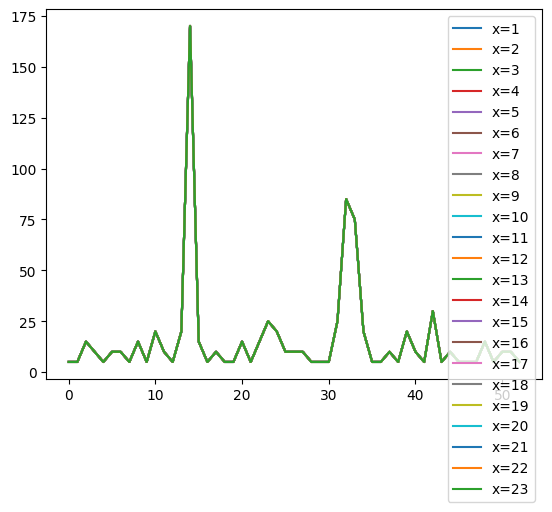

In [10]:
# Teesta_20220114.csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
re_dt = re.compile("^(?P<year>\d+)-(?P<month>\d+)-(?P<day>\d+)$");
#re_spatial = re.compile("^.*DGO(?P<spatial_idx>[0-9]).*$");
#df["x"] = df["source"].map(lambda x: re_spatial.match(x)["spatial_idx"]);

from datetime import datetime
df = pd.read_csv('Teesta_20220114.csv');

def date_to_ut(s):
    m = re_dt.match(s);
    dt = datetime(int(m["year"]), int(m["month"]), int(m["day"]));
    timestamp = (dt - datetime(1970, 1, 1)).total_seconds() // (24*60*60);
    return int(timestamp)

df["x"] = df["ID"];
df["t"] = df["Date"].map(pd.Timestamp); #.map(lambda x: date_to_ut(x));

#print(df["Date"][924])
#print(df["Date"][925])

df = df[["x", "t", "Braiding"]]
for x in range(1, 24):
    ts = df[df["x"] == 4]["t"].map(lambda t: (t - pd.Timestamp("1970-01-01")) // pd.Timedelta('1d')).to_numpy();
    ts = ts[0:54];
    #     print(df[df["x"] == 4]["t"][0:56])
# We have a 'temporal problem' here... what do we do(?)
    
    dts = np.roll(ts, -1)[:-1] - ts[:-1];
#     print(ts.shape);
#     print(dts.shape);
    plt.plot(dts, label=f"x={x}");

plt.legend();
plt.show();
#df = df[df["t"] == "2018-12-31"]
#df = df.drop_duplicates(subset=["x"]); # Maybe average duplicates?
#df

# We have duplicates in both space and time!

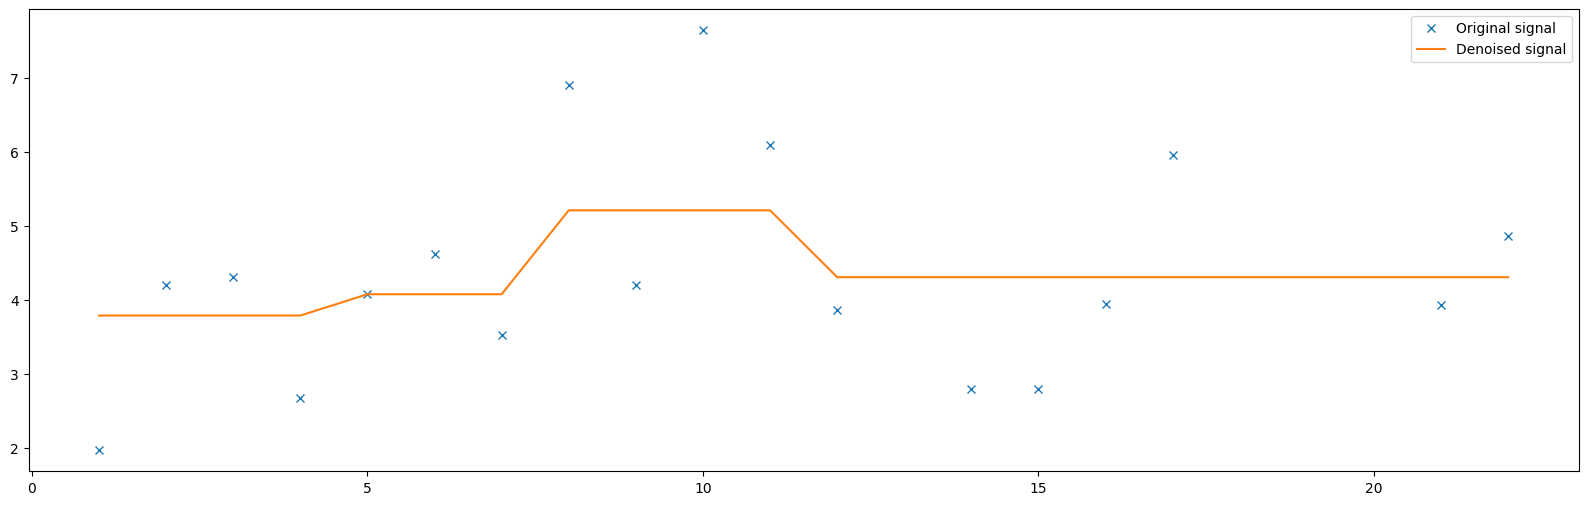

In [14]:
df = pd.read_csv('Teesta_20220114.csv');

df["x"] = df["ID"];
df["t"] = df["Date"].map(pd.Timestamp);

df = df[df["t"] == "2018-12-31"]
df = df.drop_duplicates(subset=["x"]); # Maybe average duplicates?

plt.figure(figsize=(20,6))

# Within df --> give it a matrix, NaNs with missing data

result = FBDenoisingTV(df["Braiding"].to_numpy(), chi=2, step=1.99, N=10000);
zs_TV,table_energy_dual_TV,table_energy_primal_TV = result;

# Display it as image -- x,t --> 

plt.plot(df["x"], df["Braiding"], 'x', label='Original signal');
plt.plot(df["x"], zs_TV, label='Denoised signal');
plt.legend()
plt.show()

In [93]:
# Draft an email for Barbara about/with duplicate values (***)
    
# Get data into matrix form:
# Interpolate (Linear/BFILL,FFILL) missing values first.
    
# [I don't even know what interval is ideal...]
    
# Denoising in 2D <--- TP_2D
# Plot images before/after denoising (Denoise in t or x). [BOTH]

# Email Nelly.

# How to denoise data with NaN:
# Get data into matrix form (Fill in missing cells with NaNs)
# Chambolle-Pock -- primal x_hat, prox of f & g
    # Modified f for data-fidelity |Ax-z|
    
# Next week Thursday: 19th Morning.

In [ ]:
# Matrixify the data
